PROJECT OVERVIEW 

This project seeks to analyse and determine factors that increase and decrease loan approval likelihood by building machine learning models to predict loan approval outcomes. Logistic regression and decision trees classifiers were implemented in this study.


PROBLEM STATEMENT

Financial Institutions face significant risk when it comes to loan approvals for clients who may default. Approving a high risk loan may result in financial losses.This project aims to build a classification model that minimizes the risk of approving loans  to applicants who may default.

OBJECTIVES

1. Predict loan approval likelihood based on applicant information.

2. Build a model that minimizes risk.

3. Provide lenders with insights that can help them make more informed decisions.

In [144]:
#import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
 


In [145]:
df = pd.read_csv("loan_data.csv")
#loading my data set

DATA UNDERSTANDING AND DATA CLEANING


In [146]:
df.head()
#shows the first 5 rows.

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [147]:
df.shape
# shows number of rows and columns

(45000, 14)

In [148]:
df.duplicated().sum()
#checks for duplicate rows

0

In [149]:
df.isnull().sum()
#checks for rows with missing values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [ ]:
df.info()
#summary info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.head()
#reads the first 5 rows 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [152]:
num_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]
#define numerical columns

In [153]:
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
#forces numerical columns to numeric



METHODOLOGY

CHECK FOR MULTICOLLINEARITY

<AxesSubplot:>

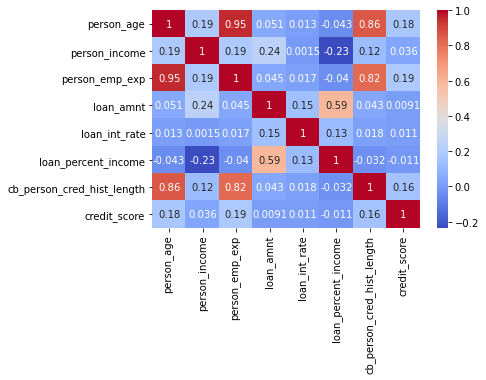

In [154]:
sns.heatmap(df[num_cols].corr(), annot= True, cmap= 'coolwarm')
#shows how the features are correlated

Age is highly correlated with person employment experience and person credit history lenth.
person employment experience is highly correlated with person credit history lenth.
Employment experience was dropped

STANDARDIZATION 

In [155]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
#standardizes the numerical columns

In [ ]:
df.head()
#reads the first 5 rows 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,female,Master,-0.104090,-0.892284,RENT,4.024953,PERSONAL,1.683039,4.016394,-0.739109,-1.419814,No,1
1,-1.118963,female,High School,-0.846005,-0.892284,OWN,-1.359209,EDUCATION,0.044782,-0.684829,-0.996863,-2.549975,Yes,0
2,-0.457264,female,High School,-0.844065,-0.397517,MORTGAGE,-0.646600,MEDICAL,0.625557,3.443074,-0.739109,0.047412,No,1
3,-0.788113,female,Bachelor,-0.007039,-0.892284,RENT,4.024953,MEDICAL,1.417829,3.443074,-0.996863,0.840507,No,1
4,-0.622689,male,Master,-0.176371,-0.727362,RENT,4.024953,MEDICAL,1.095549,4.475050,-0.481354,-0.924130,No,1


ONE HOT ENCODING

In [ ]:
df.head()
#reads the first 5 rows 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,female,Master,-0.104090,-0.892284,RENT,4.024953,PERSONAL,1.683039,4.016394,-0.739109,-1.419814,No,1
1,-1.118963,female,High School,-0.846005,-0.892284,OWN,-1.359209,EDUCATION,0.044782,-0.684829,-0.996863,-2.549975,Yes,0
2,-0.457264,female,High School,-0.844065,-0.397517,MORTGAGE,-0.646600,MEDICAL,0.625557,3.443074,-0.739109,0.047412,No,1
3,-0.788113,female,Bachelor,-0.007039,-0.892284,RENT,4.024953,MEDICAL,1.417829,3.443074,-0.996863,0.840507,No,1
4,-0.622689,male,Master,-0.176371,-0.727362,RENT,4.024953,MEDICAL,1.095549,4.475050,-0.481354,-0.924130,No,1


In [ ]:
A = df.drop(columns=["loan_status","person_emp_exp" ])
#creates a df A with loan status and employment exp dropped

In [159]:
df_encoded = pd.get_dummies(A, drop_first= True)
#performing OHE on categorical features

In [160]:
df_encoded.head()

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,person_education_Doctorate,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-0.953538,-0.104090,4.024953,1.683039,4.016394,-0.739109,-1.419814,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,-1.118963,-0.846005,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.457264,-0.844065,-0.646600,0.625557,3.443074,-0.739109,0.047412,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.788113,-0.007039,4.024953,1.417829,3.443074,-0.996863,0.840507,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,-0.622689,-0.176371,4.024953,1.095549,4.475050,-0.481354,-0.924130,1,0,0,...,1,0,0,1,0,0,1,0,0,0


CHECKING FOR CLASS IMBALANCE

In [161]:
X = df_encoded
y = df["loan_status"]
#defining target(y) and feature (X)

In [162]:
y.value_counts()
#shows how y is balanced

0    35000
1    10000
Name: loan_status, dtype: int64

Class imbalance is high

LOGISTIC REGRESSION

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size = 0.2, stratify=y)
#splits the data; 80% train 20% test, statify ensures proportion of test and train is same as the original data set
model = LogisticRegression(max_iter=1000, class_weight= 'balanced', random_state= 42)
# fits a logistic regression model.
# class weights penalizes mistakes on the minority class in the model.intercept_scaling
model.fit(X_train, y_train)
#fits the model 

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [164]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [165]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
# summary for model performance #model evaluation

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7000
           1       0.63      0.92      0.74      2000

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.90      0.86      0.87      9000

ROC-AUC: 0.956127


CLASS 0

Precision 0.97: The model correctly predicted 0 97% of the time
Recall    0.84: The model identified 84% of all actual class 0 samples
F1 score  0.90: Harmonic mean of precision and recall

CLASS 1 

Precision 0.63: The model correctly predicted 1 63% 0f the time
Recall    0.92: The model identified 92% of all actual class 1 samples
F1 score  0.74: Harmonic mean of precision and recall

Accuracy  0.86: 86% of all predictions for both classes are correct.

Precision for class 1 is lower: Some approved loans are predicted as denied (false positives)
The model is good for catching Risky  borrowers.

In [ ]:
X_train_sm = sm.add_constant(X_train)

# Fits the model
logit_model = sm.Logit(y_train, X_train_sm)

# Get results of the fit
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.221918
         Iterations 28
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36000
Model:                          Logit   Df Residuals:                    35978
Method:                           MLE   Df Model:                           21
Date:                Thu, 18 Dec 2025   Pseudo R-squ.:                  0.5811
Time:                        18:30:21   Log-Likelihood:                -7989.0
converged:                       True   LL-Null:                       -19069.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.4987      0.066   

DECISION TREES

In [167]:
X = df_encoded
y = df["loan_status"]
#defining target(y) and feature (X)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)
#splits the data 80% train 20% test
#stratify keeps class proportions consistent. it handles class imbalance

In [169]:
tree_baseline = DecisionTreeClassifier(random_state= 42)
tree_baseline.fit(X_train, y_train)
#baseline model

DecisionTreeClassifier(random_state=42)

In [170]:
y_pred = tree_baseline.predict(X_test)
y_prob = tree_baseline.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, y_prob))
# Evaluates the model
#computes precision recall f1 score accuracy and roc auc


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8750
           1       0.77      0.78      0.78      2500

    accuracy                           0.90     11250
   macro avg       0.85      0.86      0.86     11250
weighted avg       0.90      0.90      0.90     11250

ROC-AUC 0.8566285714285714


In [171]:
tree_balanced = DecisionTreeClassifier(class_weight='balanced', random_state= 42)
#class weight handles class imbalance
tree_balanced.fit(X_train, y_train)
#fits the model


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [172]:
y_pred = tree_balanced.predict(X_test)
y_prob = tree_balanced.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, y_prob))
# Evaluates the model
#computes precision recall f1 score accuracy and roc auc

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8750
           1       0.79      0.76      0.77      2500

    accuracy                           0.90     11250
   macro avg       0.86      0.85      0.86     11250
weighted avg       0.90      0.90      0.90     11250

ROC-AUC 0.8518285714285715


In [173]:
tree_pruned = DecisionTreeClassifier(max_depth= 4,
                                     min_samples_leaf= 50,
                                     class_weight= 'balanced',
                                     random_state= 42)
tree_pruned.fit(X_train, y_train)
#hyperparameters prunning and balancing class imbalance

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, random_state=42)

In [174]:
y_pred = tree_pruned.predict(X_test)
y_probb = tree_pruned.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print('ROC-AUC', roc_auc_score(y_test, y_prob))
# Evaluates the model
#computes precision recall f1 score accuracy and roc auc


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8750
           1       0.72      0.83      0.77      2500

    accuracy                           0.89     11250
   macro avg       0.84      0.87      0.85     11250
weighted avg       0.90      0.89      0.89     11250

ROC-AUC 0.8518285714285715


  CLASS 0
Model:	       Accuracy	    precision   recall      f1-score
Baseline:	      0.90	          0.94      0.93      0.94
Balanced:	      0.90	          0.93      0.94      0.94
Pruned  :     	0.89	          0.95      0.91      0.93

CLASS 0

Performance barely changes across all three models. This is the majority class so the model easily learns it.

CLASS 1

Model:	       Accuracy	    precision   recall      f1-score

Baseline:	    0.90             0.77      0.78      0.78

Balanced:	    0.90             0.79      0.76      0.77

Pruned  :       0.89             0.72      0.83      0.77

CLASS 1

Performance on recall improved with each model. The model that was pruned and weighted had the best recall meaning it performs best in catching risky loans but at the same time it precision is the lowest meaning it has more false negatives.
The final model which is pruned and weighted was retained.


CLASS 0
Precision 0.97: The model correctly predicted 0 97% of the time
Recall    0.84: The model identified 84% of all actual class 0 samples
F1 score  0.90: Harmonic mean of precision and recall

CLASS 1 
Precision 0.63: The model correctly predicted 1 63% 0f the time
Recall    0.92: The model identified 92% of all actual class 1 samples
F1 score  0.74: Harmonic mean of precision and recall

Accuracy  0.86: 86% of all predictions for both classes are correct.

Precision for class 1 is lower: Some approved loans are predicted as denied (false positives)
The model is good for catching Risky  borrowers.

SUMMARY
CLASS 0

Precision 0.95: The model correctly predicted 0 95% of the time

Recall    0.91: The model identified 91% of all actual class 0 samples

F1 score  0.90: Harmonic mean of precision and recall

CLASS 1

Precision 0.72: The model correctly predicted 1 72% of the time

Recall    0.83: The model identified 83% of all actual class 1 samples

F1 score  0.77: Harmonic mean of precision and recall

Accuracy  0.89: 89% of all predictions for both classes are correct.



DATA ANALYSIS

LOGISTIC REGRESSION VS DECISION TREES(PRUNED MODEL).


MODEL                LOGISTIC REGRESSION      DECISION TREES

ACCURACY              0.86                       0.89
ROC-AUC               0.95                       0.85
CLASS 0
PRECISION             0.97                       0.95
RECALL                0.84                       0.91
F1 SCORE              0.90                       0.93

MODEL                LOGISTIC REGRESSION       DECISION TREES
CLASS 1               
PRECISION             0.63                       0.72
RECALL                0.92                       0.83
F1 SCORE              0.74                       0.77



CLASS 0 (LOGISTIC VS DECISION TREES)

Both models have high precision and recall figures. Both models are good at detecting true positives. Both models are good at identifying loans that should be approved.

CLASS 1 (LOGISTIC VS DECISION TREES)

The logistic regression model had a higher recall 0.92 compared to decision tress 0.83. This means that it is more likely to detect risky loans compared to the Decision trees model.The trade-off is slightly lower precision, meaning some loans that could be approved might be incorrectly flagged as risky.

We would prefer a system that minimizes risk. Ideally, the system should be more likely to flag a loan that would otherwise be approved as risky, rather than approving a loan that should be considered high-risk.
Overall logistic regression is recommended for predictive performance.

LOGISTIC REGRESSION MODEL RESULTS


Optimization terminated successfully.
         Current function value: 0.221918
         Iterations 28
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                36000
Model:                          Logit   Df Residuals:                    35978
Method:                           MLE   Df Model:                           21
Date:                Thu, 18 Dec 2025   Pseudo R-squ.:                  0.5811
Time:                        18:30:21   Log-Likelihood:                -7989.0
converged:                       True   LL-Null:                       -19069.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.4987      0.066     -7.514      0.000      -0.629      -0.369
person_age                             0.0355      0.039      0.911      0.362      -0.041       0.112
person_income                          0.0440      0.016      2.720      0.007       0.012       0.076
loan_amnt                             -0.6148      0.027    -22.421      0.000      -0.668      -0.561
loan_int_rate                          0.9942      0.022     45.581      0.000       0.951       1.037
loan_percent_income                    1.3569      0.030     45.917      0.000       1.299       1.415
cb_person_cred_hist_length            -0.0242      0.039     -0.626      0.532      -0.100       0.052
credit_score                          -0.4425      0.023    -19.075      0.000      -0.488      -0.397
person_gender_male                     0.0194      0.039      0.491      0.624      -0.058       0.097
person_education_Bachelor              0.0022      0.052      0.042      0.966      -0.101       0.105
person_education_Doctorate             0.0912      0.161      0.566      0.571      -0.224       0.407
person_education_High School           0.0175      0.055      0.318      0.750      -0.090       0.125
person_education_Master                0.0096      0.063      0.153      0.878      -0.113       0.133
person_home_ownership_OTHER            0.3897      0.369      1.055      0.291      -0.334       1.113
person_home_ownership_OWN             -1.4256      0.113    -12.584      0.000      -1.648      -1.204
person_home_ownership_RENT             0.7367      0.045     16.456      0.000       0.649       0.824
loan_intent_EDUCATION                 -0.8955      0.065    -13.718      0.000      -1.023      -0.768
loan_intent_HOMEIMPROVEMENT           -0.0024      0.073     -0.033      0.974      -0.145       0.141
loan_intent_MEDICAL                   -0.2693      0.063     -4.304      0.000      -0.392      -0.147
loan_intent_PERSONAL                  -0.7036      0.067    -10.539      0.000      -0.834      -0.573
loan_intent_VENTURE                   -1.1864      0.071    -16.751      0.000      -1.325      -1.048
previous_loan_defaults_on_file_Yes   -44.3830   3.12e+07  -1.42e-06      1.000   -6.12e+07    6.12e+07
======================================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.

HYPOTHESIS TESTING.




alpha = 0.05


Non significant predictors as they all had p value greater than 0.05

loan_intent_HOMEIMPROVEMENT (p = 0.974), person_home_ownership_OTHER (p = 0.291), cb_person_cred_hist_length (p = 0.532),person_education_Bachelor (p = 0.966), person_education_Doctorate (p = 0.571), person_education_High School (p = 0.750), person_education_Master (p = 0.878), person_age (p = 0.362) and person_gender_male (p = 0.624) were not significant as they had p value greater than 0.05

Significant predictors as they all had p value less than 0.05

person_income (p = 0.007), loan_amnt (p < 0.001), loan_int_rate (p < 0.001), loan_percent_income (p < 0.001), credit_score (p < 0.001), person_home_ownership_OWN (p < 0.001), person_home_ownership_RENT (p < 0.001), loan_intent_EDUCATION (p < 0.001), loan_intent_MEDICAL (p < 0.001), loan_intent_PERSONAL (p < 0.001), and loan_intent_VENTURE (p < 0.001).



previous_loan_defaults_on_file_Yes (p ≈ 1.000) This feature almost perfectly predicts loan rejection

INTERPRETATION OF THE COEFFICIENTS

Positive coefficient means an increase in likelihood of loan approval while negative coefficient means a decrease of likelihood in loan approval.

1 person_income (+0.044) 

Higher income increases the likelihood of loan approval. Applicants with higher earnings are viewed as more capable of repaying loans.

2 loan_amnt (−0.615)

Larger loan amounts reduce the likelihood of loan approval. 

3 loan_int_rate (+0.994)

Higher interest rates increases the likelihood of loan approval.

4 loan_percent_income (+1.357)

A higher proportion of income allocated to the loan is associated with higher approval likelihood.

5 credit_score (−0.443)

Lower credit scores significantly reduce approval chances. 

6 person_home_ownership_OWN (−1.426)

Applicants who own homes are less likely to be approved. 

7 person_home_ownership_RENT (+0.737)

Applicants who rent homes are more likely to be approved. 

8 loan_intent_EDUCATION (−0.896)

Education loans are less likely to be approved.

9 loan_intent_MEDICAL (−0.269)

Medical loans are less likely to be approved.

10 loan_intent_PERSONAL (−0.704)

Personal loans are less likely to be approved.

11 loan_intent_VENTURE (−1.186)

Venture loans show the largest decrea

12 previous_loan_defaults_on_file_Yes   (-44.3830).

Applicants who have defaulted loans before show the largest decrease in loan approval likelihood.






CONCLUSIONS AND RECOMMENDATIONS

CONCLUSION
1. Positive factors (increase likelihood of loan approval):
These include: loan_percent_income, loan_int_rate, person_home_ownership_RENT, person_income. 

WHILE

Negative factors (decrease likelihood of loan approval):
These include previous_loan_defaults_on_file_Yes, person_home_ownership_OWN, loan_intent_VENTURE, loan_intent_EDUCATION, loan_intent_PERSONAL, loan_amnt, credit_score, loan_intent_MEDICAL

Loan approval decisions are influenced by affordability, credit behavior, and loan purpose rather than income alone.

2. Applicants who have defaulted on loans before are more the most likely to default on loans while applicants who have a high loan percent income pose the lowest risk.

3. Certain types of loans like venture, education, personal, and medical loans are less likely to be approved





RECOMMENDATIONS

1. Use past default history as a primary risk filter and apply higher requirements for repeat defaulters.

2. Look at how much of an applicant’s income would go toward repaying the loan, not just their total income, when deciding whether to approve it.

3. Treat different loan purposes differently, and apply stricter review for higher-risk type loans.

4. Factors that may appear minor at first glance, like home ownership status, still have an impact on loan approval outcomes and deserve consideration.
